In [2]:
import pandas as pd
import sklearn as sk
import seaborn as sb
import scipy as sp
import matplotlib as mat
import pickle
import numpy as np

In [3]:
df=pd.read_csv("churn_data.csv")
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cv=pd.get_dummies(df.drop(['tenure','customerID','MonthlyCharges','TotalCharges','Churn'],axis=1))
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
Contract_Month-to-month                    7043 non-null uint8
Contract_One year                          7043 non-null uint8
Contract_Two year                          7043 non-null uint8
PaperlessBilling_No                        7043 non-null uint8
PaperlessBilling_Yes                       7043 non-null uint8
PaymentMethod_Bank transfer (automatic)    7043 non-null uint8
PaymentMethod_Credit card (automatic)      7043 non-null uint8
PaymentMethod_Electronic check             7043 non-null uint8
PaymentMethod_Mailed check                 7043 non-null uint8
dtypes: uint8(11)
memory usage: 75.7 KB


In [5]:
td=cv.join(df[['tenure','MonthlyCharges','TotalCharges','Churn']])
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
Contract_Month-to-month                    7043 non-null uint8
Contract_One year                          7043 non-null uint8
Contract_Two year                          7043 non-null uint8
PaperlessBilling_No                        7043 non-null uint8
PaperlessBilling_Yes                       7043 non-null uint8
PaymentMethod_Bank transfer (automatic)    7043 non-null uint8
PaymentMethod_Credit card (automatic)      7043 non-null uint8
PaymentMethod_Electronic check             7043 non-null uint8
PaymentMethod_Mailed check                 7043 non-null uint8
tenure                                     7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null object
Churn   

In [6]:
td.isnull().any()

PhoneService_No                            False
PhoneService_Yes                           False
Contract_Month-to-month                    False
Contract_One year                          False
Contract_Two year                          False
PaperlessBilling_No                        False
PaperlessBilling_Yes                       False
PaymentMethod_Bank transfer (automatic)    False
PaymentMethod_Credit card (automatic)      False
PaymentMethod_Electronic check             False
PaymentMethod_Mailed check                 False
tenure                                     False
MonthlyCharges                             False
TotalCharges                               False
Churn                                      False
dtype: bool

In [7]:
td['Churn']=td.Churn.map(dict(Yes=int(1),No=int(0)))

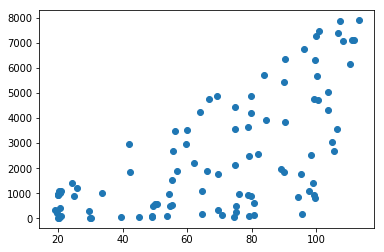

In [54]:
t=td[:100]
mat.pyplot.scatter(t['MonthlyCharges'],t['TotalCharges'])

In [42]:
to=np.random.permutation(len(df))
train=to[:int(len(df)*0.7)]
test=to[int(len(df)*0.7):]
trainset=td.iloc[train]
testset=td.iloc[test]
trainset.Churn.value_counts()

0    3618
1    1312
Name: Churn, dtype: int64

In [57]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(trainset.drop(['Churn','PhoneService_No','PaperlessBilling_No','TotalCharges'],axis=1),trainset['Churn']);

In [ ]:
trainset['TotalCharges'].isnull().values.any()

In [ ]:
trainset['TotalCharges'].astype(float)

In [58]:
ar=lr.predict(testset.drop(['Churn','PhoneService_No','PaperlessBilling_No','TotalCharges'],axis=1))

In [62]:
from sklearn.metrics import confusion_matrix
arr=confusion_matrix(ar,testset['Churn'])
arr

array([[1405,  280],
       [ 151,  277]])

In [61]:
import sklearn.metrics 
sklearn.metrics.accuracy_score(testset['Churn'],ar)

0.7960246095598675

In [60]:
trainset[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.643553
TotalCharges,0.643553,1.000000


In [12]:
d=pd.get_dummies(trainset['TotalCharges'])
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 6522 to 5037
Columns: 4645 entries,   to 999.9
dtypes: uint8(4645)
memory usage: 21.9 MB


In [13]:
trainset['TotalCharges']

6522    1505.35
6299    4233.95
1912     865.05
1437    1291.35
3460       4834
5671     1554.9
940      531.55
1747     264.85
453      2227.1
4814     1993.8
6334    7039.05
1066      973.1
46           97
3718    5497.05
6550    2249.95
4307     3580.3
929     2538.05
4623       6382
6626     573.75
2956    5038.15
5057     724.65
4260    3088.25
5315       45.6
6720     5979.7
2359    2447.45
4891      250.1
19       1862.9
3842    2462.55
5936      756.4
99       2514.5
         ...   
3988     4126.2
5644       76.2
1560     1790.6
5866      68.35
2296       45.2
2841       79.8
4727     1198.8
1760     2614.1
1629    4741.45
5093       3199
5520    4589.85
1680    1431.65
28      6369.45
1911     7657.4
2922     2602.9
2403     6046.1
6183     2317.1
6350      75.45
2488    1715.65
623      406.95
3765     134.75
545      2647.2
2367      85.55
6789       20.2
5627     485.25
1489    1282.85
4486     5500.6
6137      259.8
1374    3858.05
5037      152.7
Name: TotalCharges, Leng

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2b7117e90>,
      dtype=object)

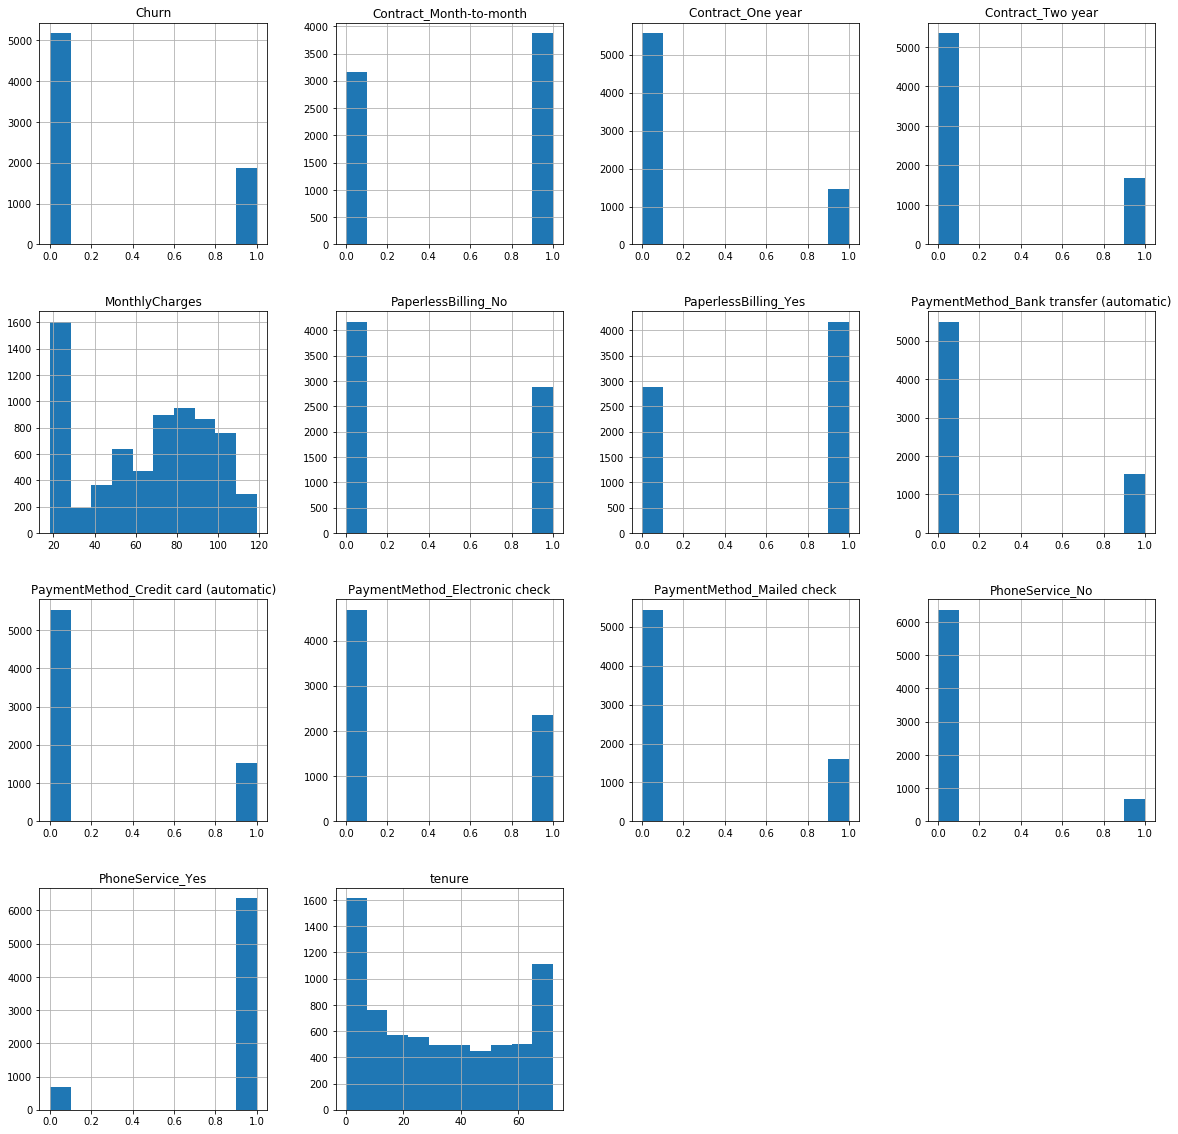

In [14]:
td.hist(figsize=(20,20))

<function matplotlib.pyplot.show>

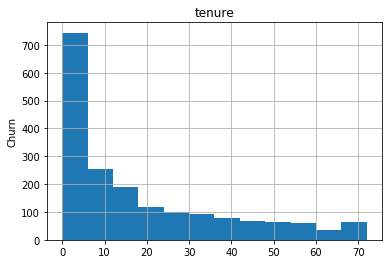

In [15]:
td.hist('tenure',weights=td['Churn'],bins=12)
mat.pyplot.ylabel('Churn')
mat.pyplot.show


In [16]:
td['Churn']

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
       ..
7013    0
7014    0
7015    0
7016    0
7017    0
7018    1
7019    0
7020    0
7021    1
7022    0
7023    0
7024    0
7025    0
7026    1
7027    0
7028    0
7029    0
7030    0
7031    0
7032    1
7033    0
7034    1
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

<function matplotlib.pyplot.show>

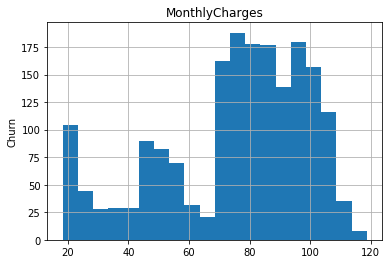

In [17]:
td.hist('MonthlyCharges',weights=td['Churn'],bins=20)
mat.pyplot.ylabel('Churn')
mat.pyplot.show

In [18]:
import matplotlib.pyplot as plt

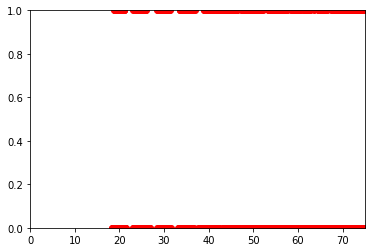

In [19]:
plt.plot(td['MonthlyCharges'],td['Churn'],'ro')
plt.axis([0,75,0,1])
plt.show()

In [20]:
td[['tenure','Churn']].corr()

,tenure,Churn
tenure,1.000000,-0.352229
Churn,-0.352229,1.000000


In [21]:
td[['tenure','MonthlyCharges']].corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [41]:
td[['PhoneService_No','PhoneService_Yes']].corr()

,PhoneService_No,PhoneService_Yes
PhoneService_No,1.0,-1.0
PhoneService_Yes,-1.0,1.0


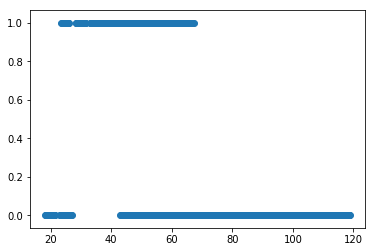

In [23]:
mat.pyplot.scatter(td['MonthlyCharges'],td['PhoneService_No'])

In [24]:
td[['MonthlyCharges','PhoneService_No']].corr()

,MonthlyCharges,PhoneService_No
MonthlyCharges,1.000000,-0.247398
PhoneService_No,-0.247398,1.000000


In [25]:
np.where((td[['TotalCharges']].applymap(type)==str))

(array([   0,    1,    2, ..., 7040, 7041, 7042]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [27]:
td['TotalCharges']=td[['TotalCharges']].convert_objects(convert_numeric=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [28]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
Contract_Month-to-month                    7043 non-null uint8
Contract_One year                          7043 non-null uint8
Contract_Two year                          7043 non-null uint8
PaperlessBilling_No                        7043 non-null uint8
PaperlessBilling_Yes                       7043 non-null uint8
PaymentMethod_Bank transfer (automatic)    7043 non-null uint8
PaymentMethod_Credit card (automatic)      7043 non-null uint8
PaymentMethod_Electronic check             7043 non-null uint8
PaymentMethod_Mailed check                 7043 non-null uint8
tenure                                     7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7032 non-null float64
Churn  

In [29]:
td['TotalCharges']=td[['TotalCharges']].round(2)

In [30]:
td['TotalCharges'].isnull().values.any()


True

In [31]:
td['TotalCharges']=td['TotalCharges'].fillna(td['TotalCharges'].mean())

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()


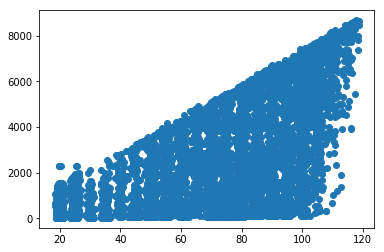

In [35]:
mat.pyplot.scatter(td['MonthlyCharges'],td['TotalCharges'])

In [39]:
td[['tenure','MonthlyCharges']].corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [53]:
td[['Contract_Month-to-month','Contract_One year','Contract_Two year' ]].corr()

,Contract_Month-to-month,Contract_One year,Contract_Two year
Contract_Month-to-month,1.000000,-0.568744,-0.622633
Contract_One year,-0.568744,1.000000,-0.289510
Contract_Two year,-0.622633,-0.289510,1.000000


In [56]:
 
td[['PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check' ]].corr()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
PaymentMethod_Bank transfer (automatic),1.000000,-0.278215,-0.376762,-0.288685
PaymentMethod_Credit card (automatic),-0.278215,1.000000,-0.373322,-0.286049
PaymentMethod_Electronic check,-0.376762,-0.373322,1.000000,-0.387372
PaymentMethod_Mailed check,-0.288685,-0.286049,-0.387372,1.000000


In [68]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(trainset.drop(['Churn','PhoneService_No','PaperlessBilling_No','TotalCharges'],axis=1),trainset['Churn'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
ar=dt.predict(testset.drop(['Churn','PhoneService_No','PaperlessBilling_No','TotalCharges'],axis=1))

In [70]:
from sklearn.metrics import confusion_matrix
arr=confusion_matrix(ar,testset['Churn'])
arr

array([[1261,  269],
       [ 295,  288]])

In [71]:
import sklearn.metrics 
sklearn.metrics.accuracy_score(testset['Churn'],ar)

0.7330809275911027